In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transforms3d as tf3d

# Generating body acc, grad ned acc, grad body acc

In [2]:

def gen_grad_acc(df):
    
    df3=df
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))

    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
    #     print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
        acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
        

    R_array=np.array([tf3d.quaternions.quat2mat([i,j,k,l]) for i,j,k,l in zip(df['q[0]'],df['q[1]'],df['q[2]'],df['q[3]'])])
    v_ned_array=np.array([df['speed[%i]'%(i)] for i in range(3)]).T
    v_body_array=np.array([(i.T@(j.T)).T for i,j in zip(R_array,v_ned_array)])
    gamma_array=np.array([(i.T@(np.array([0,0,9.81]).T)).T for i in R_array])



    df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
    df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    
    for i in range(3):
        df3['speed_body[%i]'%(i)]=v_body_array[:,i]
        df3['gamma[%i]'%(i)]=gamma_array[:,i]
    return df3



In [3]:
log1=pd.read_csv('./logs/avion/vol1/log_real.csv')
log2=pd.read_csv('./logs/avion/vol2/log_real.csv')
log3=pd.read_csv('./logs/avion/vol3/log_real.csv')


In [4]:

log1=gen_grad_acc(log1)
log2=gen_grad_acc(log2)
log3=gen_grad_acc(log3)



log1.to_csv('./logs/avion/vol1/log_real_processed.csv')
log2.to_csv('./logs/avion/vol2/log_real_processed.csv')
log3.to_csv('./logs/avion/vol3/log_real_processed.csv')

# Analyse to cut time 

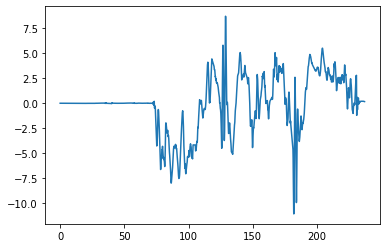

In [5]:
plt.plot(log1.t,log1['speed[2]'])

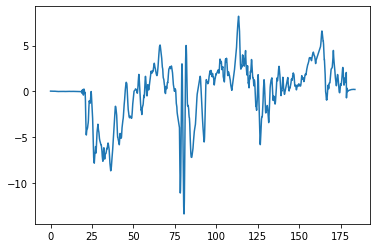

In [6]:
plt.plot(log2.t,log2['speed[2]'])

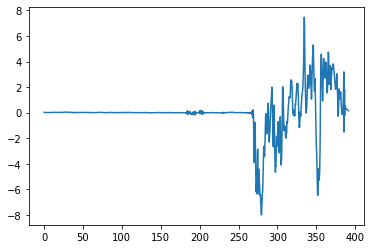

In [7]:
plt.plot(log3.t,log3['speed[2]'])

# Cutting time

In [8]:
log1_r=log1[log1["t"]>75]
log1_r=log1_r[log1_r["t"]<225]

log2_r=log2[log2["t"]>20]
log2_r=log2_r[log2_r['t']<175]

log3_r=log3[log3["t"]>275]
log3_r=log3_r[log3_r['t']<370]


log1_r.to_csv('./logs/avion/vol1/log_real_processed.csv')
log2_r.to_csv('./logs/avion/vol2/log_real_processed.csv')
log3_r.to_csv('./logs/avion/vol3/log_real_processed.csv')



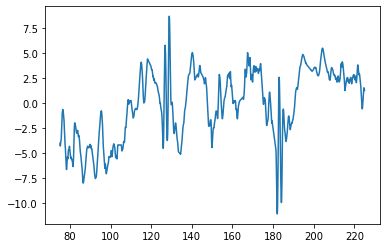

In [9]:
plt.plot(log1_r.t,log1_r['speed[2]'])

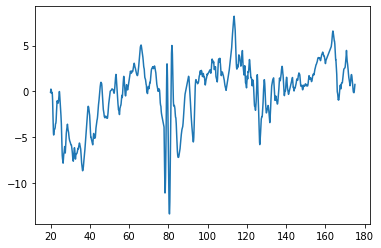

In [10]:
plt.plot(log2_r.t,log2_r['speed[2]'])

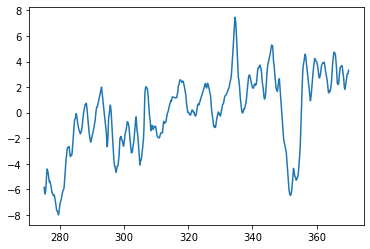

In [11]:
plt.plot(log3_r.t,log3_r['speed[2]'])

# Building agregated dataset

In [12]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()
log3_r["t"]=log3_r["t"]-log3_r['t'].min()+5e-3+log2_r["t"].max()


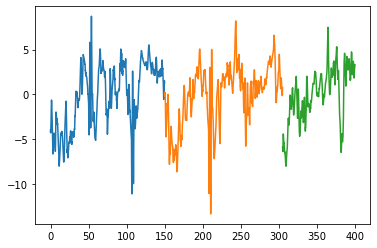

In [13]:
plt.plot(log1_r.t,log1_r['speed[2]'])
plt.plot(log2_r.t,log2_r['speed[2]'])
plt.plot(log3_r.t,log3_r['speed[2]'])

In [14]:
df4=pd.concat([log1_r,log2_r,log3_r])

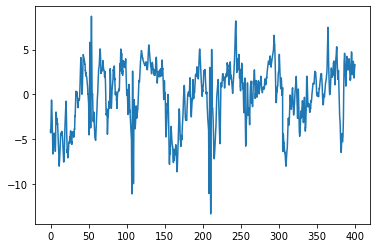

In [15]:
plt.plot(df4.t,df4['speed[2]'])


In [16]:
df4=df4.reset_index()
df4.to_csv('./logs/avion/vol123/log_real_processed.csv')

(-15.0, 15.0)

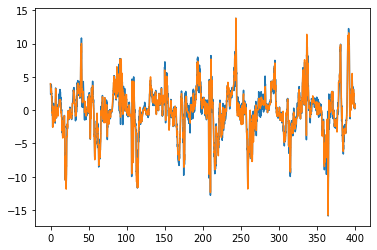

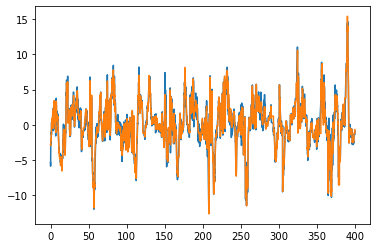

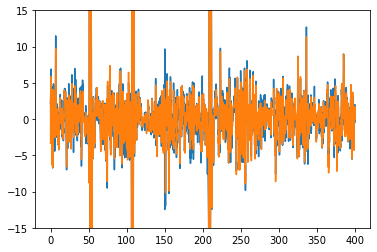

In [17]:
[(plt.figure(),plt.plot(df4["t"],df4['acc[%i]'%(i)]),plt.plot(df4["t"],df4['acc_ned_grad[%i]'%(i)])) for i in range(3)]
plt.gca().set_ylim(-15,15)

## Copter

In [18]:
log1=pd.read_csv('./logs/copter/vol1/log_real.csv')
log2=pd.read_csv('./logs/copter/vol2/log_real.csv')


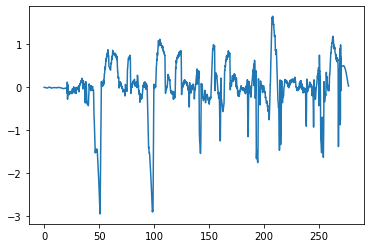

In [19]:
plt.plot(log1.t,log1['speed[2]'])

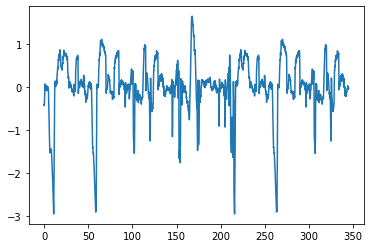

In [20]:
plt.plot(log2.t,log2['speed[2]'])

In [21]:


log1=gen_grad_acc(log1)
log2=gen_grad_acc(log2)


log1_r=log1[log1["t"]>40]
log1_r=log1_r[log1_r["t"]<250]

log2_r=log2[log2["t"]>0]
log2_r=log2_r[log2_r['t']<300]




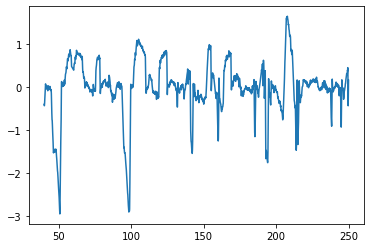

In [22]:
plt.plot(log1_r.t,log1_r['speed[2]'])

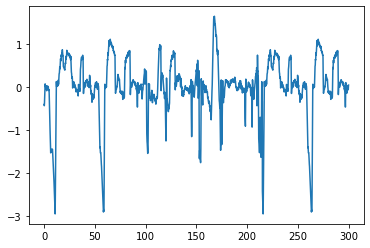

In [23]:
plt.plot(log2_r.t,log2_r['speed[2]'])

In [24]:

log1_r.to_csv('./logs/copter/vol1/log_real_processed.csv')
log2_r.to_csv('./logs/copter/vol2/log_real_processed.csv')


In [25]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()

Text(0.5, 0, 't')

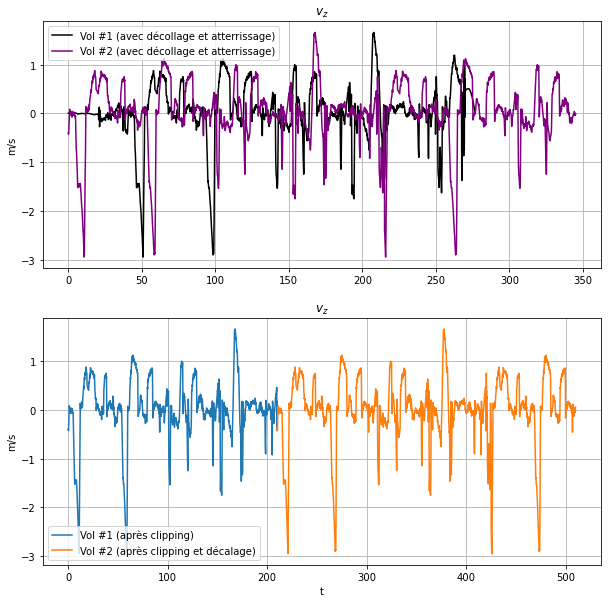

In [40]:
plt.figure(figsize=(10,10))
plt.gcf().add_subplot(211)
plt.plot(log1.t,log1['speed[2]'],color="black",label="Vol #1 (avec décollage et atterrissage)")
plt.plot(log2.t,log2['speed[2]'],color="purple",label="Vol #2 (avec décollage et atterrissage)")
plt.gca().set_ylabel('m/s')
plt.gca().set_title('$v_z$')
plt.grid()
plt.legend()

plt.gcf().add_subplot(212)
plt.plot(log1_r.t,log1_r['speed[2]'],label="Vol #1 (après clipping)")
plt.plot(log2_r.t,log2_r['speed[2]'],label="Vol #2 (après clipping et décalage)")
plt.gca().set_ylabel('m/s')
plt.gca().set_title('$v_z$')

plt.grid()
plt.legend()
plt.gca().set_xlabel('t')


In [27]:
df3=pd.concat([log1_r,log2_r])



In [28]:
df3.to_csv('./logs/copter/vol12/log_real_processed.csv')


Text(0.5, 0, 't')

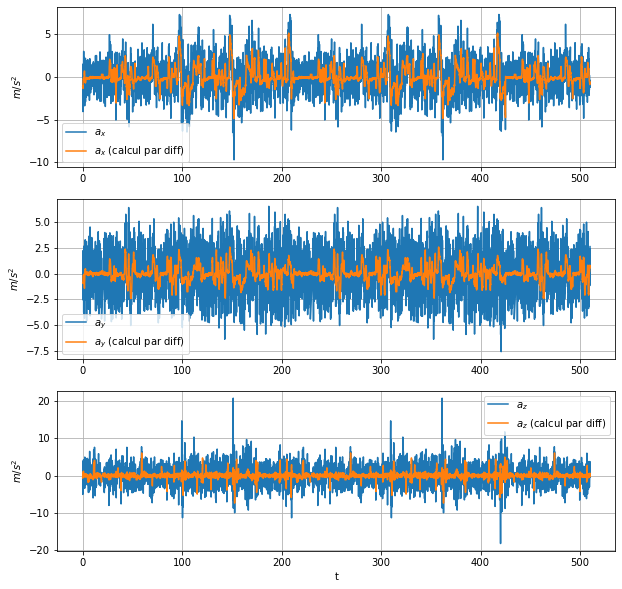

In [45]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.gcf().add_subplot(3,1,i+1)
    plt.plot(df3.t,df3['acc[%i]'%(i)],label="$a_{%s}$"%('xyz'[i]))
    plt.plot(df3.t,df3['acc_ned_grad[%i]'%(i)],label="$a_{%s}$ (calcul par diff)"%('xyz'[i]))
    plt.legend(),plt.grid(),plt.gca().set_ylabel("$m/{s^{2}}$")
plt.gca().set_xlabel("t")